In [38]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

print('TensorFlow Version: ', tf.__version__)

TensorFlow Version:  2.7.0


In [40]:
hdf_df = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1 (1).h5','r')
hdf_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [41]:
X_train = hdf_df['X_train']
X_test = hdf_df['X_test']
X_val = hdf_df['X_val']
y_train = hdf_df['y_train']
y_test = hdf_df['y_test']
y_val = hdf_df['y_val']

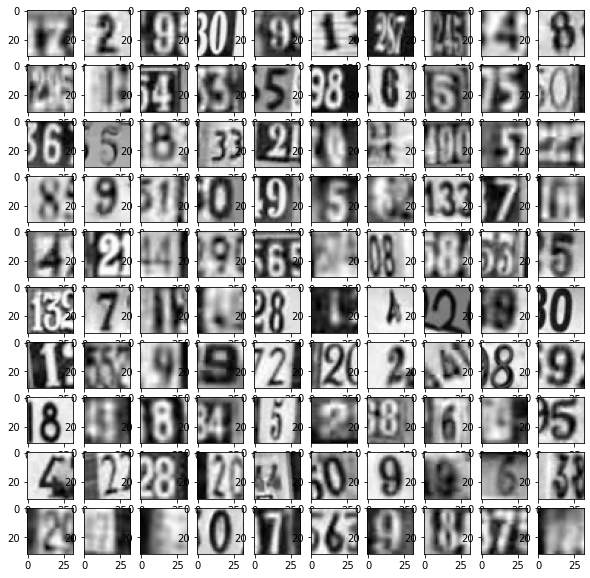

In [42]:
fig = plt.figure(figsize = (10, 10))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()


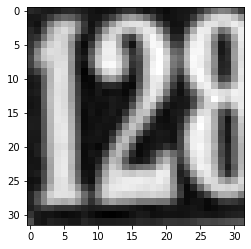

Label:  2


In [43]:
plt.imshow(X_train[0], cmap = 'gray')    
plt.show()
print('Label: ', y_train[0])

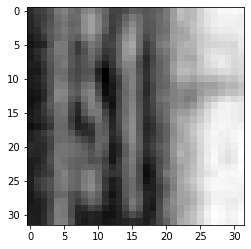

Label:  1


In [44]:
plt.imshow(X_test[0], cmap = 'gray')    
plt.show()
print('Label: ', y_test[0])

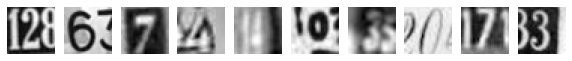

Labels for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [45]:
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].reshape(32,32), cmap = 'gray')
    plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_train[0:10]))

In [46]:
X_train = np.asarray(X_train).reshape(42000, 1024)
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

In [47]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [48]:
X_train = np.asarray(X_train).reshape(42000, 1024)
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

In [49]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

In [50]:
keras_model = Sequential()

In [51]:
# Input Layer
keras_model.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))
keras_model.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))
keras_model.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))
keras_model.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))
keras_model.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))
keras_model.add(Dense(10))
#Adding Activation function
keras_model.add(Activation('softmax'))

In [52]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [53]:
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
history = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 6s 26ms/step - loss: 2.2920 - accuracy: 0.1329 - val_loss: 2.2699 - val_accuracy: 0.1624
Epoch 2/20
210/210 [==============================] - 5s 24ms/step - loss: 2.2468 - accuracy: 0.1891 - val_loss: 2.2180 - val_accuracy: 0.2220
Epoch 3/20
210/210 [==============================] - 5s 24ms/step - loss: 2.1868 - accuracy: 0.2324 - val_loss: 2.1405 - val_accuracy: 0.2634
Epoch 4/20
210/210 [==============================] - 5s 24ms/step - loss: 2.1109 - accuracy: 0.2543 - val_loss: 2.0631 - val_accuracy: 0.2701
Epoch 5/20
210/210 [==============================] - 5s 24ms/step - loss: 2.0295 - accuracy: 0.2858 - val_loss: 1.9628 - val_accuracy: 0.3106
Epoch 6/20
210/210 [==============================] - 5s 24ms/step - loss: 1.9432 - accuracy: 0.3208 - val_loss: 1.9740 - val_accuracy: 0.2812
Epoch 7/20
210/210 [==============================] - 5s 25ms/step - loss: 1.8415 - accuracy: 0.3666 - val_loss: 1.7334 - val_accuracy: 0.4196

In [55]:
results = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using basic Neural Network (SGD) : ', results[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.9886 - accuracy: 0.6983
Validation accuracy using basic Neural Network (SGD) :  0.698283314704895


In [56]:
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
history_1 = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 8s 34ms/step - loss: 1.5687 - accuracy: 0.5142 - val_loss: 1.1237 - val_accuracy: 0.6536
Epoch 2/20
210/210 [==============================] - 7s 33ms/step - loss: 1.1095 - accuracy: 0.6501 - val_loss: 1.0249 - val_accuracy: 0.6887
Epoch 3/20
210/210 [==============================] - 7s 32ms/step - loss: 1.0103 - accuracy: 0.6857 - val_loss: 0.8972 - val_accuracy: 0.7305 0s - loss: 1.0093 - accuracy: 0.68 - E
Epoch 4/20
210/210 [==============================] - 7s 33ms/step - loss: 0.9427 - accuracy: 0.7054 - val_loss: 0.9432 - val_accuracy: 0.7063
Epoch 5/20
210/210 [==============================] - 7s 35ms/step - loss: 0.8821 - accuracy: 0.7280 - val_loss: 0.8920 - val_accuracy: 0.7196
Epoch 6/20
210/210 [==============================] - 6s 30ms/step - loss: 0.8527 - accuracy: 0.7380 - val_loss: 0.8306 - val_accuracy: 0.7448
Epoch 7/20
210/210 [==============================] - 6s 29ms/step - loss: 0.8035 - accuracy: 0.7514 - 